In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('movies.csv')

In [3]:
data

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,26-12-1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,19-08-1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,13-11-1912,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,06-03-1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,29-01-2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,13-02-2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,08-03-2019,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,15-03-2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


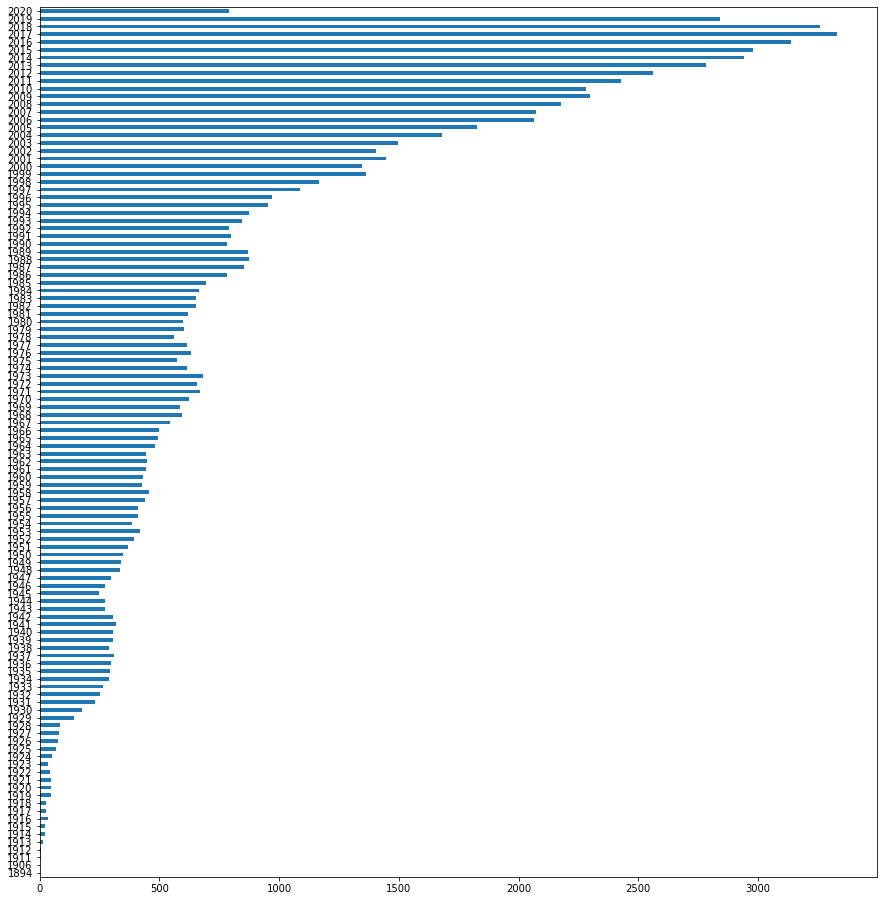

In [4]:
import matplotlib.pyplot as plt
data.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [5]:
new_data = data

In [6]:
def get_actor1(x):
    if type(x) == float:
        return np.NaN
    l = x.split(",")
    if len(l) == 0:
        return np.NaN
    else:
        return l[0]

In [7]:
new_data['actor_1_name'] = new_data['actors'].map(lambda x: get_actor1(x))

In [8]:
def get_actor2(x):
    if type(x) == float:
        return np.NaN
    l = x.split(",")
    if len(l) <= 1:
        return np.NaN
    else:
        return l[1]

In [9]:
new_data['actor_2_name'] = new_data['actors'].map(lambda x: get_actor2(x))

In [10]:
def get_actor3(x):
    if type(x) == float:
        return np.NaN
    l = x.split(",")
    if len(l) <= 2:
        return np.NaN
    else:
        return l[2]

In [11]:
new_data['actor_3_name'] = new_data['actors'].map(lambda x: get_actor3(x))

In [12]:
def get_director(x):
    if type(x) == float:
        return np.NaN
    l = x.split(",")
    if len(l) == 0:
        return np.NaN
    else:
        return "".join(l)

In [13]:
new_data['director_name'] = new_data['director'].map(lambda x: get_director(x))

In [14]:
def get_genres(x):
    if type(x) == float:
        return np.NaN
    l = x.split(", ")
    if len(l) <= 0:
        return np.NaN
    else:
        return "<".join(l)

In [15]:
new_data['genres'] = new_data['genre'].map(lambda x: get_genres(x))

In [16]:
new_data['genres']

0                        Romance
1          Biography<Crime<Drama
2                          Drama
3                  Drama<History
4        Adventure<Drama<Fantasy
                  ...           
85850                     Comedy
85851               Comedy<Drama
85852                      Drama
85853               Drama<Family
85854                      Drama
Name: genres, Length: 85855, dtype: object

In [17]:
movie_data = new_data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','original_title']]

In [18]:
movie_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,original_title
0,Alexander Black,Blanche Bayliss,William Courtenay,Chauncey Depew,Romance,Miss Jerry
1,Charles Tait,Elizabeth Tait,John Tait,Norman Campbell,Biography<Crime<Drama,The Story of the Kelly Gang
2,Urban Gad,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen,Drama,Den sorte drøm
3,Charles L. Gaskill,Helen Gardner,Pearl Sindelar,Miss Fielding,Drama<History,Cleopatra
4,Francesco Bertolini Adolfo Padovan,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro,Adventure<Drama<Fantasy,L'Inferno
...,...,...,...,...,...,...
85850,Ludovic Colbeau-Justin,Dany Boon,Philippe Katerine,Anne Serra,Comedy,Le lion
85851,Johan Nijenhuis,Herman Finkers,Johanna ter Steege,Leonie ter Braak,Comedy<Drama,De Beentjes van Sint-Hildegard
85852,Vineesh Aaradya,Anoop Chandran,Indrans,Sona Nair,Drama,Padmavyuhathile Abhimanyu
85853,Ahmet Faik Akinci,Ahmet Faik Akinci,Belma Mamati,Metin Keçeci,Drama<Family,Sokagin Çocuklari


In [19]:
movie_data.isna().sum()

director_name      87
actor_1_name       69
actor_2_name      188
actor_3_name      442
genres              0
original_title      0
dtype: int64

In [20]:
print(movie_data.shape)
movie_data = movie_data.dropna(how='any')

(85855, 6)


In [21]:
movie_data.isna().sum()

director_name     0
actor_1_name      0
actor_2_name      0
actor_3_name      0
genres            0
original_title    0
dtype: int64

In [22]:
movie_data.shape

(85348, 6)

In [23]:
movie_data = movie_data.rename(columns={'original_title':'movie_title'})

In [24]:
movie_data['movie_title'] = movie_data['movie_title'].str.lower()

In [26]:
temp = []
for i in movie_data['movie_title']:
    movie_name = i.split(" ")
    try:
        num = int(movie_name[-1])
        try: 
            ind = movie_data.loc[movie_data['movie_title']==" ".join(movie_name[:-1])].index[0]
            temp.append("<".join(movie_name[:-1]))
        except:
            temp.append("<".join(movie_name))
    except:
        temp.append("<".join(movie_name))

In [27]:
movie_data['comb'] = movie_data['actor_1_name'] + '<' + movie_data['actor_2_name'] + '<'+ movie_data['actor_3_name'] + '<'+ movie_data['director_name'] +'<' + movie_data['genres']+'<'+ temp

In [28]:
movie_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Alexander Black,Blanche Bayliss,William Courtenay,Chauncey Depew,Romance,miss jerry,Blanche Bayliss< William Courtenay< Chauncey D...
1,Charles Tait,Elizabeth Tait,John Tait,Norman Campbell,Biography<Crime<Drama,the story of the kelly gang,Elizabeth Tait< John Tait< Norman Campbell<Cha...
2,Urban Gad,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen,Drama,den sorte drøm,Asta Nielsen< Valdemar Psilander< Gunnar Helse...
3,Charles L. Gaskill,Helen Gardner,Pearl Sindelar,Miss Fielding,Drama<History,cleopatra,Helen Gardner< Pearl Sindelar< Miss Fielding<C...
4,Francesco Bertolini Adolfo Padovan,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro,Adventure<Drama<Fantasy,l'inferno,Salvatore Papa< Arturo Pirovano< Giuseppe de L...
...,...,...,...,...,...,...,...
85850,Ludovic Colbeau-Justin,Dany Boon,Philippe Katerine,Anne Serra,Comedy,le lion,Dany Boon< Philippe Katerine< Anne Serra<Ludov...
85851,Johan Nijenhuis,Herman Finkers,Johanna ter Steege,Leonie ter Braak,Comedy<Drama,de beentjes van sint-hildegard,Herman Finkers< Johanna ter Steege< Leonie ter...
85852,Vineesh Aaradya,Anoop Chandran,Indrans,Sona Nair,Drama,padmavyuhathile abhimanyu,Anoop Chandran< Indrans< Sona Nair<Vineesh Aar...
85853,Ahmet Faik Akinci,Ahmet Faik Akinci,Belma Mamati,Metin Keçeci,Drama<Family,sokagin çocuklari,Ahmet Faik Akinci< Belma Mamati< Metin Keçeci<...


In [29]:
def reset_genres(x):
    l = x.split("<")
    return " ".join(l)

In [30]:
movie_data['genres'] = movie_data['genres'].map(lambda x: reset_genres(x))

In [31]:
print(movie_data.shape)
movie_data.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
print(movie_data.shape)

(85348, 7)
(80337, 7)


In [32]:
movie_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Alexander Black,Blanche Bayliss,William Courtenay,Chauncey Depew,Romance,miss jerry,Blanche Bayliss< William Courtenay< Chauncey D...
1,Charles Tait,Elizabeth Tait,John Tait,Norman Campbell,Biography Crime Drama,the story of the kelly gang,Elizabeth Tait< John Tait< Norman Campbell<Cha...
2,Urban Gad,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen,Drama,den sorte drøm,Asta Nielsen< Valdemar Psilander< Gunnar Helse...
4,Francesco Bertolini Adolfo Padovan,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro,Adventure Drama Fantasy,l'inferno,Salvatore Papa< Arturo Pirovano< Giuseppe de L...
5,Sidney Olcott,R. Henderson Bland,Percy Dyer,Gene Gauntier,Biography Drama,"from the manger to the cross; or, jesus of naz...",R. Henderson Bland< Percy Dyer< Gene Gauntier<...
...,...,...,...,...,...,...,...
85850,Ludovic Colbeau-Justin,Dany Boon,Philippe Katerine,Anne Serra,Comedy,le lion,Dany Boon< Philippe Katerine< Anne Serra<Ludov...
85851,Johan Nijenhuis,Herman Finkers,Johanna ter Steege,Leonie ter Braak,Comedy Drama,de beentjes van sint-hildegard,Herman Finkers< Johanna ter Steege< Leonie ter...
85852,Vineesh Aaradya,Anoop Chandran,Indrans,Sona Nair,Drama,padmavyuhathile abhimanyu,Anoop Chandran< Indrans< Sona Nair<Vineesh Aar...
85853,Ahmet Faik Akinci,Ahmet Faik Akinci,Belma Mamati,Metin Keçeci,Drama Family,sokagin çocuklari,Ahmet Faik Akinci< Belma Mamati< Metin Keçeci<...


In [33]:
movie_data.to_csv('main_data.csv',index=False)